## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [23]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [24]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [25]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [26]:
x_train = (x_train/255).astype("float32")
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = (x_test/255).astype("float32")
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [27]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# # 將 X 與 Y 獨立放進變數
# x_train, y_train = train
# x_test, y_test = test
# # 資料前處理 - 標準化
# x_train = x_train / 255.
# x_test = x_test / 255.

# # 將資料從圖形 (RGB) 轉為向量 (Single Vector)
# x_train = x_train.reshape((len(x_train), -1))
# x_test = x_test.reshape((len(x_test), -1))

# # 將目標轉為 one-hot encoding
# y_train = keras.utils.to_categorical(y_train, num_classes=10)
# y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [29]:
"""
立你的神經網路
"""
from keras.models import Sequential
from keras.layers import Dense

def build_simplemlp():
    model = Sequential()
    model.add(Dense(units=256, 
                input_dim=3072,
                kernel_initializer='normal', 
                activation='relu'))
    model.add(Dense(units=128,
                kernel_initializer='normal', 
                activation='relu'))
    model.add(Dense(units=10,
                kernel_initializer='normal', 
                activation='relu'))
    print(model.summary())
    return model
# model = build_simplemlp()
# print(model.summary())

In [30]:
"""
Compile 模型
"""


def complie_train_model(model, optimizer,epochs, batch_size):
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
          epochs= epochs, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    return model

In [ ]:
# # 以視覺畫方式檢視訓練過程

# import matplotlib.pyplot as plt

# train_loss = model.history.history["loss"]
# valid_loss = model.history.history["val_loss"]

# train_acc = model.history.history["acc"]
# valid_acc = model.history.history["val_acc"]

# plt.plot(range(len(train_loss)), train_loss, label="train loss")
# plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
# plt.legend()
# plt.title("Loss")
# plt.show()

# plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
# plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
# plt.legend()
# plt.title("Accuracy")
# plt.show()

In [53]:
# 以視覺畫方式檢視訓練過程
import pandas as pd

def show_train_history(model):
    df = pd.DataFrame(model.history.history)
    
    df1 = df[["acc", "val_acc"]]
    df2 = df[["loss", "val_loss"]]    
    
    g1 = df1.plot.line()
    g1.set_xlabel("Epoch")
    g1.set_ylabel("Acc")
    
    g2 = df2.plot.line()
    g2.set_xlabel("Epoch")
    g2.set_ylabel("Loss")
    return df

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 33s 663us/step - loss: 4.8680 - acc: 0.1482 - val_loss: 4.8060 - val_acc: 0.1402
Epoch 2/10
50000/50000 [==============================] - 75s 2ms/step - loss: 4.7932 - acc: 0.1684 - val_loss: 4.7778 - val_acc: 0.1877
Epoch 3/10
50000/50000 [==============================] - 51s 1ms/ste

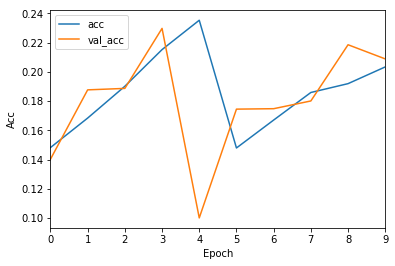

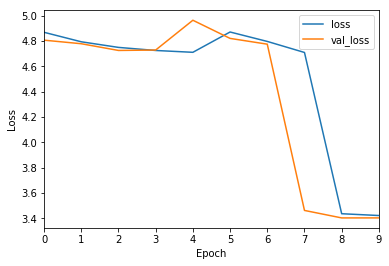

In [54]:
"""
Main
"""
from keras.optimizers import Adam

lr = 0.001
epochs = 10
batch_size = 256

model = build_simplemlp()
optimizer = Adam(lr= lr)
model = complie_train_model(model, optimizer,epochs, batch_size)
df = show_train_history(model)

In [55]:
df

,val_loss,val_acc,loss,acc
0,4.805993,0.1402,4.868005,0.14818
1,4.777842,0.1877,4.793198,0.16838
2,4.724816,0.1887,4.748917,0.19016
3,4.728134,0.2298,4.724626,0.21528
4,4.963263,0.1000,4.710168,0.23538
5,4.819937,0.1745,4.870439,0.14790
6,4.774355,0.1748,4.796030,0.16702
7,3.461990,0.1801,4.708885,0.18590
8,3.402931,0.2186,3.435972,0.19196
9,3.403075,0.2089,3.421851,0.20342


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 370us/step - loss: 10.2187 - acc: 0.1315 - val_loss: 10.2036 - val_acc: 0.1657
Epoch 2/10
50000/50000 [==============================] - 15s 305us/step - loss: 8.9326 - acc: 0.1513 - val_loss: 8.7900 - val_acc: 0.1494
Epoch 3/10
50000/50000 [==============================] - 14s 283

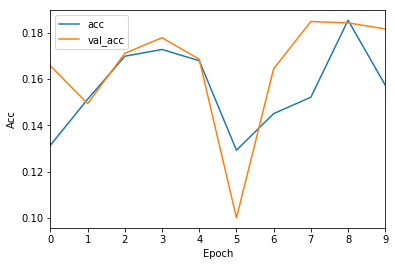

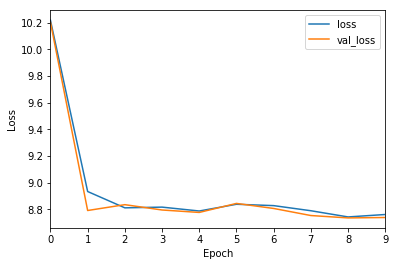

In [56]:
lr = 0.01
epochs = 10
batch_size = 256

model = build_simplemlp()
optimizer = Adam(lr= lr)
model = complie_train_model(model, optimizer,epochs, batch_size)
df = show_train_history(model)

In [57]:
df

,val_loss,val_acc,loss,acc
0,10.203595,0.1657,10.218719,0.13146
1,8.789981,0.1494,8.932590,0.15128
2,8.833821,0.1711,8.809974,0.16982
3,8.793802,0.1778,8.815342,0.17274
4,8.775466,0.1685,8.786223,0.16788
5,8.843184,0.1001,8.836787,0.12930
6,8.805337,0.1644,8.826645,0.14508
7,8.752243,0.1848,8.788251,0.15214
8,8.734317,0.1842,8.741659,0.18534
9,8.737375,0.1816,8.759950,0.15736
